In [1]:

from fastai.vision.all import *


In [2]:

path = untar_data(URLs.CAMVID_TINY)


In [6]:

path.ls()[2].ls()


(#100) [Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0016E5_07979_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0016E5_06990_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0016E5_08137_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0006R0_f03180_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0016E5_08057_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0006R0_f00960_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0016E5_00840_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0001TP_009000_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0006R0_f02910_P.png'),Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0001TP_007500_P.png')...]

In [13]:

label_func = lambda o: path/'labels'/f'{o.stem}_rc_P{o.suffix}'


In [14]:

a_path = Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0001TP_007500_P.png')

label_func(a_path)


Path('/home/rcalix/.fastai/data/camvid_tiny/labels/0001TP_007500_P_rc_P.png')

In [15]:

dls = SegmentationDataLoaders.from_label_func(
        path, bs=8, fnames = get_image_files(path/"images"),
        label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
        codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


/home/rcalix/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rcalix/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.621699,2.191200,00:04


epoch,train_loss,valid_loss,time
0,1.854193,1.477304,00:03
1,1.598928,1.146051,00:03
2,1.390509,0.901162,00:03
3,1.241522,0.866987,00:03
4,1.117479,0.794350,00:03
5,1.007743,0.746404,00:03
6,0.918769,0.733910,00:02
7,0.849508,0.732423,00:02


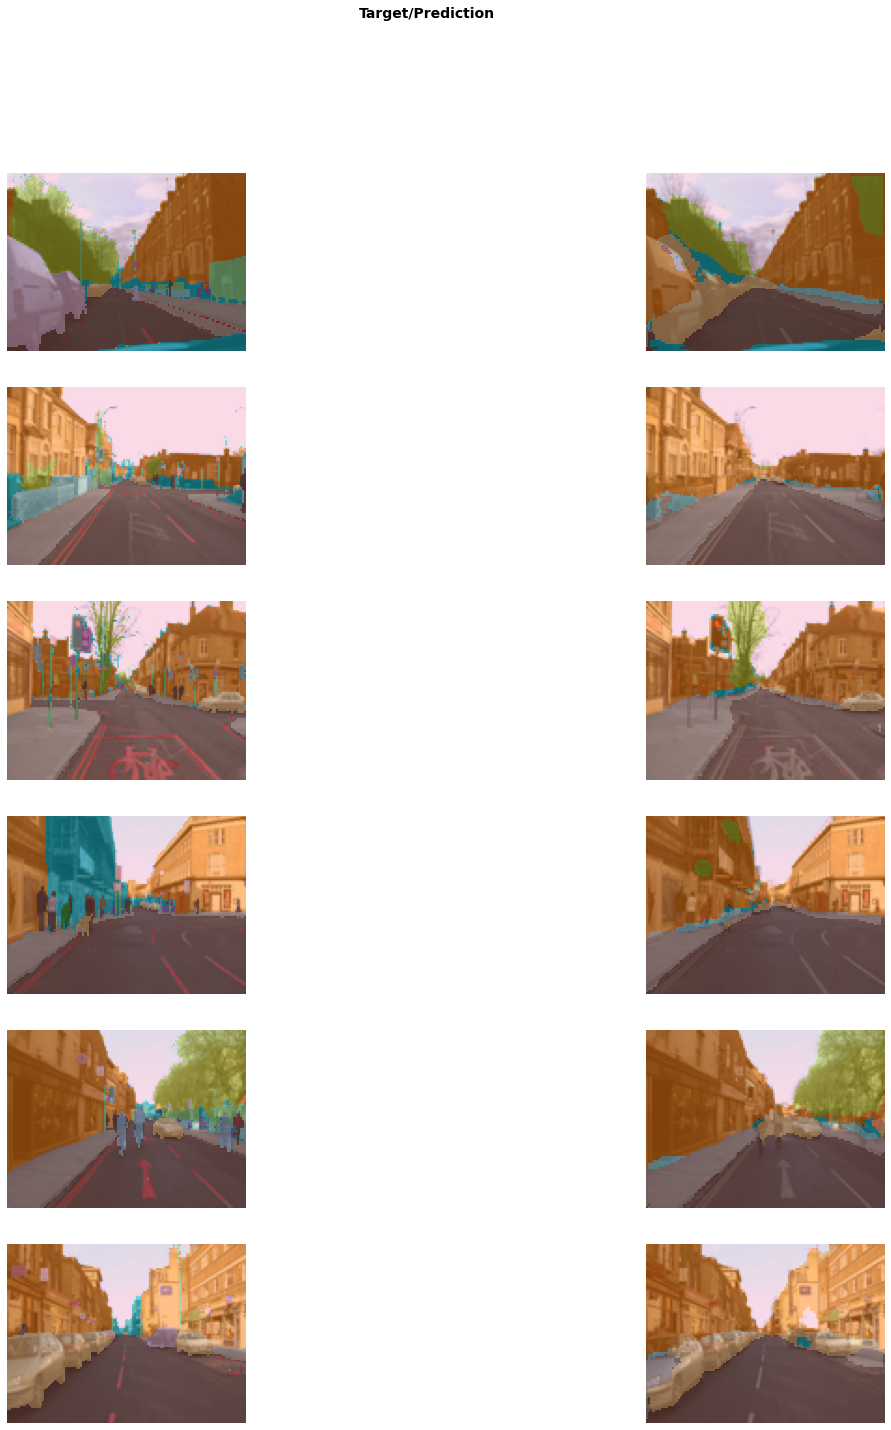

In [18]:

learn.show_results(max_n=6, figsize=(21, 23))
